In [26]:
import pandas as pd

In [27]:
pd.options.display.max_columns = None

In [28]:
train = pd.read_csv('train-dec-feb.csv', encoding='utf8', sep=',', decimal='.')

In [29]:
train.head()

,User_id,Credit_id,Count_months,Amount,Month_payment,Payed,To_pay_this_month,Credit_taken,Pay_date
0,23746,982,9,100.0,10.0,10.0,10.0,2020-02-29 23:59:10,2020-02-29 23:59:10
1,23745,980,9,100.0,10.0,10.0,10.0,2020-02-29 23:52:55,2020-02-29 23:52:55
2,23742,981,9,100.0,10.0,10.0,10.0,2020-02-29 23:53:59,2020-02-29 23:53:59
3,23739,961,9,500.0,50.0,50.0,50.0,2020-02-29 23:28:27,2020-02-29 23:28:27
4,23728,958,9,100.0,10.0,10.0,10.0,2020-02-29 23:25:15,2020-02-29 23:25:15


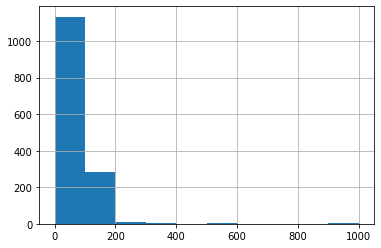

In [30]:
train.Payed.hist(bins=10, range = (0,1000));

In [31]:
To_pay = sum(train.To_pay_this_month)
print(To_pay)

90282.0


In [32]:
Actually_payed = sum(train.Payed)
print(Actually_payed)

67267.87


In [49]:
test = pd.read_csv('trainmarch.csv', encoding='utf8', sep=',', decimal='.')

In [50]:
test.head()

,User_id,Credit_id,Count_months,Amount,Month_payment,Payed,To_pay_this_month,Credit_taken,Pay_date
0,23746,982,9,100.0,10.0,0,10.0,2020-02-29 23:59:10,2020-03-29
1,23742,981,9,100.0,10.0,0,10.0,2020-02-29 23:53:59,2020-03-29
2,23745,980,9,100.0,10.0,0,10.0,2020-02-29 23:52:55,2020-03-29
3,3753,979,9,100.0,10.0,0,10.0,2020-02-29 23:52:37,2020-03-29
4,23469,978,9,100.0,10.0,0,10.0,2020-02-29 23:52:21,2020-03-29


In [51]:
To_pay_in_march = sum(test.To_pay_this_month)
print(To_pay_in_march)

38307.0


In [36]:
train.columns

Index(['User_id', 'Credit_id', 'Count_months', 'Amount', 'Month_payment',
       'Payed', 'To_pay_this_month', 'Credit_taken', 'Pay_date'],
      dtype='object')

In [37]:
# предскажем катбустом

No handles with labels found to put in legend.


0:	learn: 68.9717031	total: 980us	remaining: 195ms
1:	learn: 66.0953890	total: 1.88ms	remaining: 186ms
2:	learn: 63.3152676	total: 2.33ms	remaining: 153ms
3:	learn: 60.6699247	total: 2.7ms	remaining: 132ms
4:	learn: 58.5925945	total: 3.07ms	remaining: 120ms
5:	learn: 56.8815107	total: 3.39ms	remaining: 110ms
6:	learn: 55.0205096	total: 4.1ms	remaining: 113ms
7:	learn: 53.5462548	total: 4.47ms	remaining: 107ms
8:	learn: 52.3759218	total: 4.84ms	remaining: 103ms
9:	learn: 51.1174679	total: 5.21ms	remaining: 99ms
10:	learn: 50.1134910	total: 5.75ms	remaining: 98.7ms
11:	learn: 49.1857159	total: 6.44ms	remaining: 101ms
12:	learn: 48.3917013	total: 7.15ms	remaining: 103ms
13:	learn: 47.6242916	total: 8.36ms	remaining: 111ms
14:	learn: 46.9723714	total: 8.83ms	remaining: 109ms
15:	learn: 46.3785111	total: 9.68ms	remaining: 111ms
16:	learn: 45.7837091	total: 10.4ms	remaining: 112ms
17:	learn: 45.3368786	total: 11.5ms	remaining: 117ms
18:	learn: 44.9120528	total: 13.1ms	remaining: 125ms
19:	le

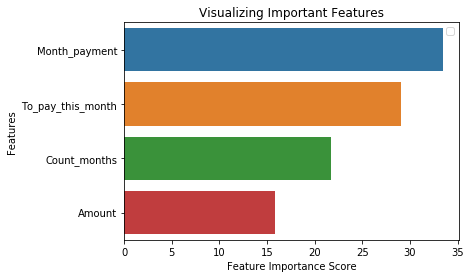

предположительно всего выплатят за март:  31698.89502008334


In [38]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, r2_score
from catboost import CatBoostRegressor
import seaborn as sns
import matplotlib.pyplot as plt
# initialize data
features = ['Count_months', 'Amount', 'Month_payment', 'To_pay_this_month']

#lab_enc = preprocessing.LabelEncoder()
#df_target = df_investors.TotalPays.copy()
#encoded = lab_enc.fit_transform(df_target)

#X_train, X_val, y_train, y_val = train_test_split(df_investors[features], encoded, test_size=0.3)

X_train = train[features]
X_val = test[features]
y_train = train.Payed.copy()
y_val = test.Payed.copy()

model=CatBoostRegressor(iterations=200, depth=5, learning_rate=0.1, loss_function='RMSE')
model.fit(X_train, y_train)
preds = model.predict(X_val)
feature_imp = pd.Series(model.feature_importances_,index=features).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

#plt.plot(y_val, label = 'actual')
# Plot the predicted values
#plt.plot(preds, label = 'prediction')
#plt.xticks(rotation = '60'); 
#plt.legend()
 
#print("предположительно всего выплатят за март: ", preds, '\n')
print("предположительно всего выплатят за март: ", sum(preds))


In [39]:
# пробуем предсказать случайным лесом

No handles with labels found to put in legend.


предположительно всего выплатят за март:  34564


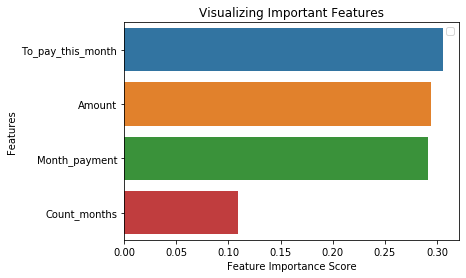

In [41]:
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
features = ['Count_months', 'Amount', 'Month_payment', 'To_pay_this_month']

X_train = train[features]
X_val = test[features]
y_train = train.Payed.astype('int64').copy()
y_val = test.Payed.astype('int64').copy()

clf = ensemble.RandomForestClassifier(n_estimators=1000)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_val)

#print("предположительно всего выплатят за март: ", y_pred, '\n')
print("предположительно всего выплатят за март: ", sum(y_pred))

feature_imp = pd.Series(clf.feature_importances_,index=features).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [42]:
# предскажем логистической регрессией (НЕАДЕКВАТНЫЕ РЕЗУЛЬТАТЫ)

In [43]:
from sklearn.linear_model import LogisticRegression
features = ['Count_months', 'Amount', 'Month_payment', 'To_pay_this_month']

y = train.Payed.astype('int64').copy()
x = train[features]
x_val = test[features]
y_val = test.Payed.astype('int64').copy()

clf = LogisticRegression(random_state=0, C=2.0, penalty='l2').fit(x, y)

print("предположительно всего выплатят за март: ", sum(clf.predict(x_val)))


предположительно всего выплатят за март:  99588


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [44]:
#Предскажем деревом решений

In [45]:
from sklearn.tree import DecisionTreeClassifier

y = train.Payed.astype('int64').copy()
x = train[features]
x_val = test[features]
y_val = test.Payed.astype('int64').copy()

model = DecisionTreeClassifier()
model.fit(x,y)
proba = model.predict(x_val)

print("предположительно всего выплатят за март: ", sum(proba))

предположительно всего выплатят за март:  33465


In [46]:
# предскажем методом ближайших соседей

In [47]:
from sklearn.neighbors import KNeighborsClassifier

y = train.Payed.astype('int64').copy()
x = train[features]
x_val = test[features]
y_val = test.Payed.astype('int64').copy()

model_knc = KNeighborsClassifier(n_neighbors = 18)
model_knc.fit(x,y)

proba = model_knc.predict(x_val)
print("предположительно всего выплатят за март: ", sum(proba))

предположительно всего выплатят за март:  31888
